In [189]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
data_co = pd.read_csv('../logs/coach.csv', sep=',')
data_hr = pd.read_csv('../logs/stream_hr.csv', sep=',')

data_co = data_co.rename(columns={'System Time':'Time (min)', 'ch-0':'Instruction'})
data_hr = data_hr.rename(columns={'System Time':'Time (min)', 'ch-0':'Heart-Rate (BPM)'})

In [3]:
hrr_40  = 125.2
hrr_70  = 155.1
hr_rest = 85.4

In [4]:
coach_time = data_co.loc[:,'Time (min)'].to_list()
heart_time = data_hr.loc[:,'Time (min)'].to_list()

def time_to_val(time_list):
    l = []
    for t in time_list[:]:
        tl = t[-8:].split(':')
        v = float((int(tl[0]) * 60 * 60) + (int(tl[1]) * 60) + (int(tl[2]) * 1)) / 60.0
        l.append(v)
    return l

coach = time_to_val(coach_time)
heart = time_to_val(heart_time)

min_v = heart[0]
coach = [ coach[i] - min_v for i in range(len(coach)) ]
heart = [ heart[i] - min_v for i in range(len(heart)) ]

data_co.loc[:,'Time (min)'] = coach[:]
data_hr.loc[:,'Time (min)'] = heart[:]

print(len(coach), len(heart))

154 1711


In [5]:
#sns.set_theme(style="darkgrid")
cmap = sns.color_palette(as_cmap=True)
sns_blue   = cmap[0]
sns_orange = cmap[1]
sns_green  = cmap[2]
sns_red    = cmap[3]
sns_purple = cmap[4]
sns_brown  = cmap[5]
sns_pink   = cmap[6]
sns_grey   = cmap[7]
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [6]:
calib_end = data_co.loc[16,:]
calib_time = calib_end['Time (min)']

speed_inc_1 = data_co.loc[25-2, 'Time (min)']
speed_inc_2 = data_co.loc[29-2, 'Time (min)']
speed_inc_3 = data_co.loc[32-2, 'Time (min)']
speed_inc_4 = data_co.loc[36-2, 'Time (min)']

exercise_01 = data_co.loc[19-2, 'Time (min)']
exercise_02 = data_co.loc[40-2, 'Time (min)']
exercise_03 = data_co.loc[53-2, 'Time (min)']
exercise_04 = data_co.loc[61-2, 'Time (min)']
exercise_05 = data_co.loc[74-2, 'Time (min)']
exercise_06 = data_co.loc[82-2, 'Time (min)']
exercise_07 = data_co.loc[95-2, 'Time (min)']
exercise_08 = data_co.loc[103-2,'Time (min)']
exercise_09 = data_co.loc[116-2,'Time (min)']
exercise_10 = data_co.loc[124-2,'Time (min)']
exercise_11 = data_co.loc[137-2,'Time (min)']

exercise_end = data_co.loc[154-2,'Time (min)']

print(calib_time)
print(exercise_end)



4.6666666666667425
26.783333333333417


In [7]:
data_hr = data_hr[ data_hr['Time (min)'] < exercise_end ]

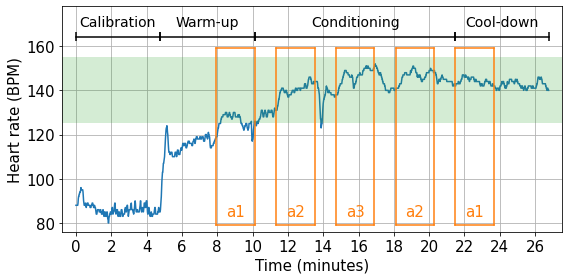

In [186]:
#sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(1,1, figsize=(8,4))
sns.lineplot(
    x='Time (min)', y='Heart-Rate (BPM)',
    data=data_hr, ax=axs
)

# horizontal bars
min_v, max_v = -10.0, (1750.0/60.0)+10

hrr_mid = np.mean([hrr_40, hrr_70])
#plt.plot([min_v,max_v], [hrr_40, hrr_40], color=sns_green)
#plt.plot([min_v,max_v], [hrr_70, hrr_70], color=sns_green)
plt.plot([min_v-1.5,max_v+1.5], [hrr_mid, hrr_mid], color=sns_green, alpha=0.2, linewidth=66)
#plt.plot([min_v,max_v], [hr_rest, hr_rest], color=sns_purple, linestyle=':', marker='D')

# vertical bars
min_v, max_v = 79.0, 159.0
#plt.plot([calib_time,  calib_time],  [min_v,max_v], color=sns_pink, linestyle=':', marker='D')
#plt.plot([speed_inc_1, speed_inc_1], [min_v,max_v], color=sns_red,  linestyle=':', marker='v')
#plt.plot([speed_inc_2, speed_inc_2], [min_v,max_v], color=sns_red,  linestyle=':', marker='v')
#plt.plot([speed_inc_3, speed_inc_3], [min_v,max_v], color=sns_red,  linestyle=':', marker='v')
#plt.plot([speed_inc_4, speed_inc_4], [min_v,max_v], color=sns_red,  linestyle=':', marker='v')

#plt.plot([exercise_01, exercise_01], [min_v,max_v], color=sns_pink)
plt.plot([exercise_02, exercise_02], [min_v,max_v], color=sns_orange)
plt.plot([exercise_03, exercise_03], [min_v,max_v], color=sns_orange)
plt.plot([exercise_04, exercise_04], [min_v,max_v], color=sns_orange)
plt.plot([exercise_05, exercise_05], [min_v,max_v], color=sns_orange)
plt.plot([exercise_06, exercise_06], [min_v,max_v], color=sns_orange)
plt.plot([exercise_07, exercise_07], [min_v,max_v], color=sns_orange)
plt.plot([exercise_08, exercise_08], [min_v,max_v], color=sns_orange)
plt.plot([exercise_09, exercise_09], [min_v,max_v], color=sns_orange)
plt.plot([exercise_10, exercise_10], [min_v,max_v], color=sns_orange)
plt.plot([exercise_11, exercise_11], [min_v,max_v], color=sns_orange)
#plt.plot([exercise_end, exercise_end], [min_v,max_v], color=sns_pink)

plt.plot([exercise_02, exercise_03],[max_v,max_v], color=sns_orange)
plt.plot([exercise_02, exercise_03],[min_v,min_v], color=sns_orange)
plt.plot([exercise_04, exercise_05],[max_v,max_v], color=sns_orange)
plt.plot([exercise_04, exercise_05],[min_v,min_v], color=sns_orange)
plt.plot([exercise_06, exercise_07],[max_v,max_v], color=sns_orange)
plt.plot([exercise_06, exercise_07],[min_v,min_v], color=sns_orange)
plt.plot([exercise_08, exercise_09],[max_v,max_v], color=sns_orange)
plt.plot([exercise_08, exercise_09],[min_v,min_v], color=sns_orange)
plt.plot([exercise_10, exercise_11],[max_v,max_v], color=sns_orange)
plt.plot([exercise_10, exercise_11],[min_v,min_v], color=sns_orange)

plt.errorbar( [0.0,exercise_01],         [max_v+5.2,max_v+5.2], yerr=2, color='black')
plt.errorbar( [exercise_01,exercise_03], [max_v+5.2,max_v+5.2], yerr=2, color='black')
plt.errorbar( [exercise_03,exercise_10], [max_v+5.2,max_v+5.2], yerr=2, color='black')
plt.errorbar( [exercise_10,exercise_end],[max_v+5.2,max_v+5.2], yerr=2, color='black')

phase_y = 170.8
cal_x = np.mean([0.0,exercise_01])
war_x = np.mean([exercise_01, exercise_03])
con_x = np.mean([exercise_03, exercise_10])
coo_x = np.mean([exercise_10, exercise_end])

plt.text(cal_x, phase_y, "Calibration",  ha='center',va='center', size=14) #rotation=15,
plt.text(war_x, phase_y, "Warm-up",      ha='center',va='center', size=14) #rotation=15,
plt.text(con_x, phase_y, "Conditioning", ha='center',va='center', size=14) #rotation=15,
plt.text(coo_x, phase_y, "Cool-down",    ha='center',va='center', size=14) #rotation=15,

act_y = 85.0
m1_x = np.mean([exercise_01, exercise_02])
s1_x = np.mean([exercise_02, exercise_03])
m2_x = np.mean([exercise_03, exercise_04])
l1_x = np.mean([exercise_04, exercise_05])
m3_x = np.mean([exercise_05, exercise_06])
a1_x = np.mean([exercise_06, exercise_07])
m4_x = np.mean([exercise_07, exercise_08])
l2_x = np.mean([exercise_08, exercise_09])
m5_x = np.mean([exercise_09, exercise_10])
s2_x = np.mean([exercise_10, exercise_11])
m6_x = np.mean([exercise_11, exercise_end])

S = 'a1' #'S'
L = 'a2' #'L'
A = 'a3' #'A'

plt.text(s1_x, act_y, S,  ha='center',va='center', color=sns_orange, size=15)
plt.text(l1_x, act_y, L,  ha='center',va='center', color=sns_orange, size=15)
plt.text(a1_x, act_y, A,  ha='center',va='center', color=sns_orange, size=15)
plt.text(l2_x, act_y, L,  ha='center',va='center', color=sns_orange, size=15)
plt.text(s2_x, act_y, S,  ha='center',va='center', color=sns_orange, size=15)

#plt.text(m1_x, act_y, "M",  ha='center',va='center', color=sns_orange)
#plt.text(m2_x, act_y, "M",  ha='center',va='center', color=sns_orange)
#plt.text(m3_x, act_y, "M",  ha='center',va='center', color=sns_orange)
#plt.text(m4_x, act_y, "M",  ha='center',va='center', color=sns_orange)
#plt.text(m5_x, act_y, "M",  ha='center',va='center', color=sns_orange)
#plt.text(m6_x, act_y, "M",  ha='center',va='center', color=sns_orange)

plt.xticks(np.arange(0,exercise_end,2),size=15)
plt.yticks(size=15)

plt.xlim([-0.8,27.5])
plt.ylim(bottom=76, top=178)
plt.xlabel('Time (minutes)', size=15)
plt.ylabel('Heart rate (BPM)', size=15)
plt.tight_layout()
axs.grid('on')

plt.savefig('bin/HR-Time.png', dpi=300)


In [9]:
hrr_mid

140.15

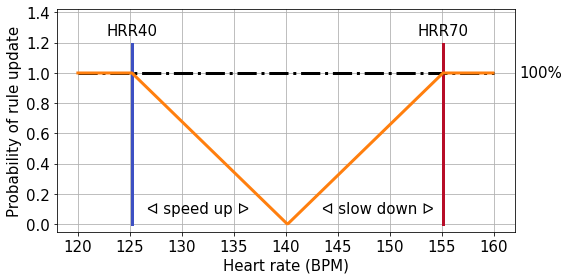

In [192]:
def fuzzy(hr_exer, hrr40, hrr70):
    hr_targ = np.mean([hrr40, hrr70])
    
    hr_norm = np.abs(hr_exer - hr_targ) / (hr_targ - hrr40)
    hr_norm[ hr_norm > 1.0] = 1.0
    return hr_norm

heart_rate  = np.arange(120.0, 160.0, 0.1)
probability = fuzzy(heart_rate, hrr_40, hrr_70)

fig, axs = plt.subplots(1,1, figsize=(8,4))

# Plot the lines.
cmap = mpl.cm.get_cmap('coolwarm')
plt.plot([hrr_40, hrr_40], [0.0, 1.195], linewidth=3.0, color=cmap(0.01))
plt.plot([hrr_70, hrr_70], [0.0, 1.195], linewidth=3.0, color=cmap(0.99))
plt.plot([120.0,  160.0],  [1.0, 1.0],   linewidth=3.0, color='black', linestyle='-.')
plt.plot(heart_rate,       probability,  linewidth=3.0, color=sns_orange)

# Add text
plt.text(hrr_40, 1.28, 'HRR40',  ha='center', va='center', color='black', size=15)
plt.text(hrr_70, 1.28, 'HRR70',  ha='center', va='center', color='black', size=15)
plt.text(164.5,   1.0, '100%',   ha='center', va='center', color='black', size=15)

min_prob = np.argmin(probability)
min_hr   = heart_rate[min_prob]

plt.text(np.mean([min_hr, hrr_40])-1.2, 0.1, '\u140A speed up \u1405',  ha='center', va='center', color='black', size=15)
plt.text(np.mean([min_hr, hrr_70])+1.2, 0.1, '\u140A slow down \u1405', ha='center', va='center', color='black', size=15)

plt.xticks(size=15)
plt.yticks(size=15)

#plt.xlim([-0.8,27.5])
plt.ylim(bottom=-0.05, top=1.425)
plt.xlabel('Heart rate (BPM)', size=15)
plt.ylabel('Probability of rule update', size=15)
plt.tight_layout()
axs.grid('on')

plt.savefig('bin/Fuzzy-Probability-2.png', dpi=300)

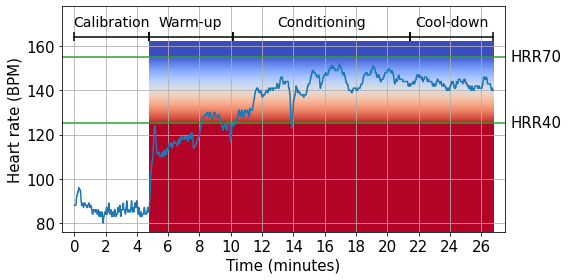

In [218]:
#sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(1,1, figsize=(8,4))
sns.lineplot(
    x='Time (min)', y='Heart-Rate (BPM)',
    data=data_hr, ax=axs
)

# horizontal bars
min_v, max_v = -10.0, (1750.0/60.0)+10
hrr_mid = np.mean([hrr_40, hrr_70])

padding  = 50
gradient = np.linspace(0,1,256)
gradient = np.concatenate([np.zeros(padding*1), gradient, np.ones(padding*8)])

xv, yv = np.meshgrid(gradient, gradient)
zv = yv

#extentfloats (left, right, bottom, top), optional
plt.imshow(zv, cmap='coolwarm', origin='upper', extent=[exercise_01, exercise_end, hrr_40-50, hrr_70+7], aspect='auto')
# cmap='coolwarm', origin='upper'

# cmap='seismic', origin='upper'
# cmap='RdBu', origin='lower'
# cmap='RdYlBu', origin='lower'

plt.plot([min_v,max_v], [hrr_40, hrr_40], color=sns_green)
plt.plot([min_v,max_v], [hrr_70, hrr_70], color=sns_green)


# vertical bars
min_v, max_v = 79.0, 159.0

plt.errorbar( [0.0,exercise_01],         [max_v+5.2,max_v+5.2], yerr=2, color='black')
plt.errorbar( [exercise_01,exercise_03], [max_v+5.2,max_v+5.2], yerr=2, color='black')
plt.errorbar( [exercise_03,exercise_10], [max_v+5.2,max_v+5.2], yerr=2, color='black')
plt.errorbar( [exercise_10,exercise_end],[max_v+5.2,max_v+5.2], yerr=2, color='black')

phase_y = 170.8
cal_x = np.mean([0.0,exercise_01])
war_x = np.mean([exercise_01, exercise_03])
con_x = np.mean([exercise_03, exercise_10])
coo_x = np.mean([exercise_10, exercise_end])

plt.text(cal_x, phase_y, "Calibration",  ha='center',va='center', size=14) #rotation=15,
plt.text(war_x, phase_y, "Warm-up",      ha='center',va='center', size=14) #rotation=15,
plt.text(con_x, phase_y, "Conditioning", ha='center',va='center', size=14) #rotation=15,
plt.text(coo_x, phase_y, "Cool-down",    ha='center',va='center', size=14) #rotation=15,



plt.text(29.5, hrr_40, 'HRR40',  ha='center', va='center', color='black', size=15)
plt.text(29.5, hrr_70, 'HRR70',  ha='center', va='center', color='black', size=15)
#plt.text(164.5,   1.0, '100%',   ha='center', va='center', color='black', size=15)


plt.xticks(np.arange(0,exercise_end,2),size=15)
plt.yticks(size=15)

plt.xlim([-0.8,27.5])
plt.ylim(bottom=76, top=178)
plt.xlabel('Time (minutes)', size=15)
plt.ylabel('Heart rate (BPM)', size=15)
plt.tight_layout()
axs.grid('on')

plt.savefig('bin/Fuzzy-HR-Time.png', dpi=300)